In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load_data

In [2]:
# 데이터 로드
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = pd.DataFrame(diabetes.data)
y = pd.Series(diabetes.target)
data = pd.concat([X,y], axis = 1)
data.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']

In [3]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### About_data

In [4]:
# 결측치가 있나보자.


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [5]:
# 각 data의 타입


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age       442 non-null float64
sex       442 non-null float64
bmi       442 non-null float64
bp        442 non-null float64
s1        442 non-null float64
s2        442 non-null float64
s3        442 non-null float64
s4        442 non-null float64
s5        442 non-null float64
s6        442 non-null float64
target    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


### Task) Encoding

: 성별의 경우, 해석의 편리성을 위해 앞서 배운 'Encoding'할 필요가 있다.
 - 여성 : 0, 남성: 1

-0.044642    235
 0.050680    207
Name: sex, dtype: int64

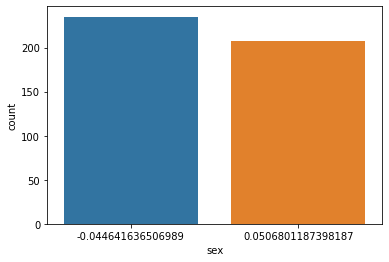

In [9]:
def encoding (x):
 """
 채워넣기
 
 """

In [10]:
data.sex = data.sex.apply(encoding)

In [11]:
data.sex.value_counts()

0    235
1    207
Name: sex, dtype: int64

In [12]:
# One-hot-encoding code

#s_dummy = pd.get_dummies(df.sex, columns=['sex0','sex1'])
#s_dummy.columns=['sex0','sex1']
#s_dummy.head()

: 이 경우 one_hot_encoding을 쓸 경우 Beta가 증가한다는 단점이 있다.

### EDA

In [13]:
X = data.drop('target', axis=1)
y = data.target

In [14]:
X.shape, y.shape

((442, 10), (442,))

### Task) Plot between features

: 다중공선성을 알아보기 위해 변수들간의 plot을 그려보자.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


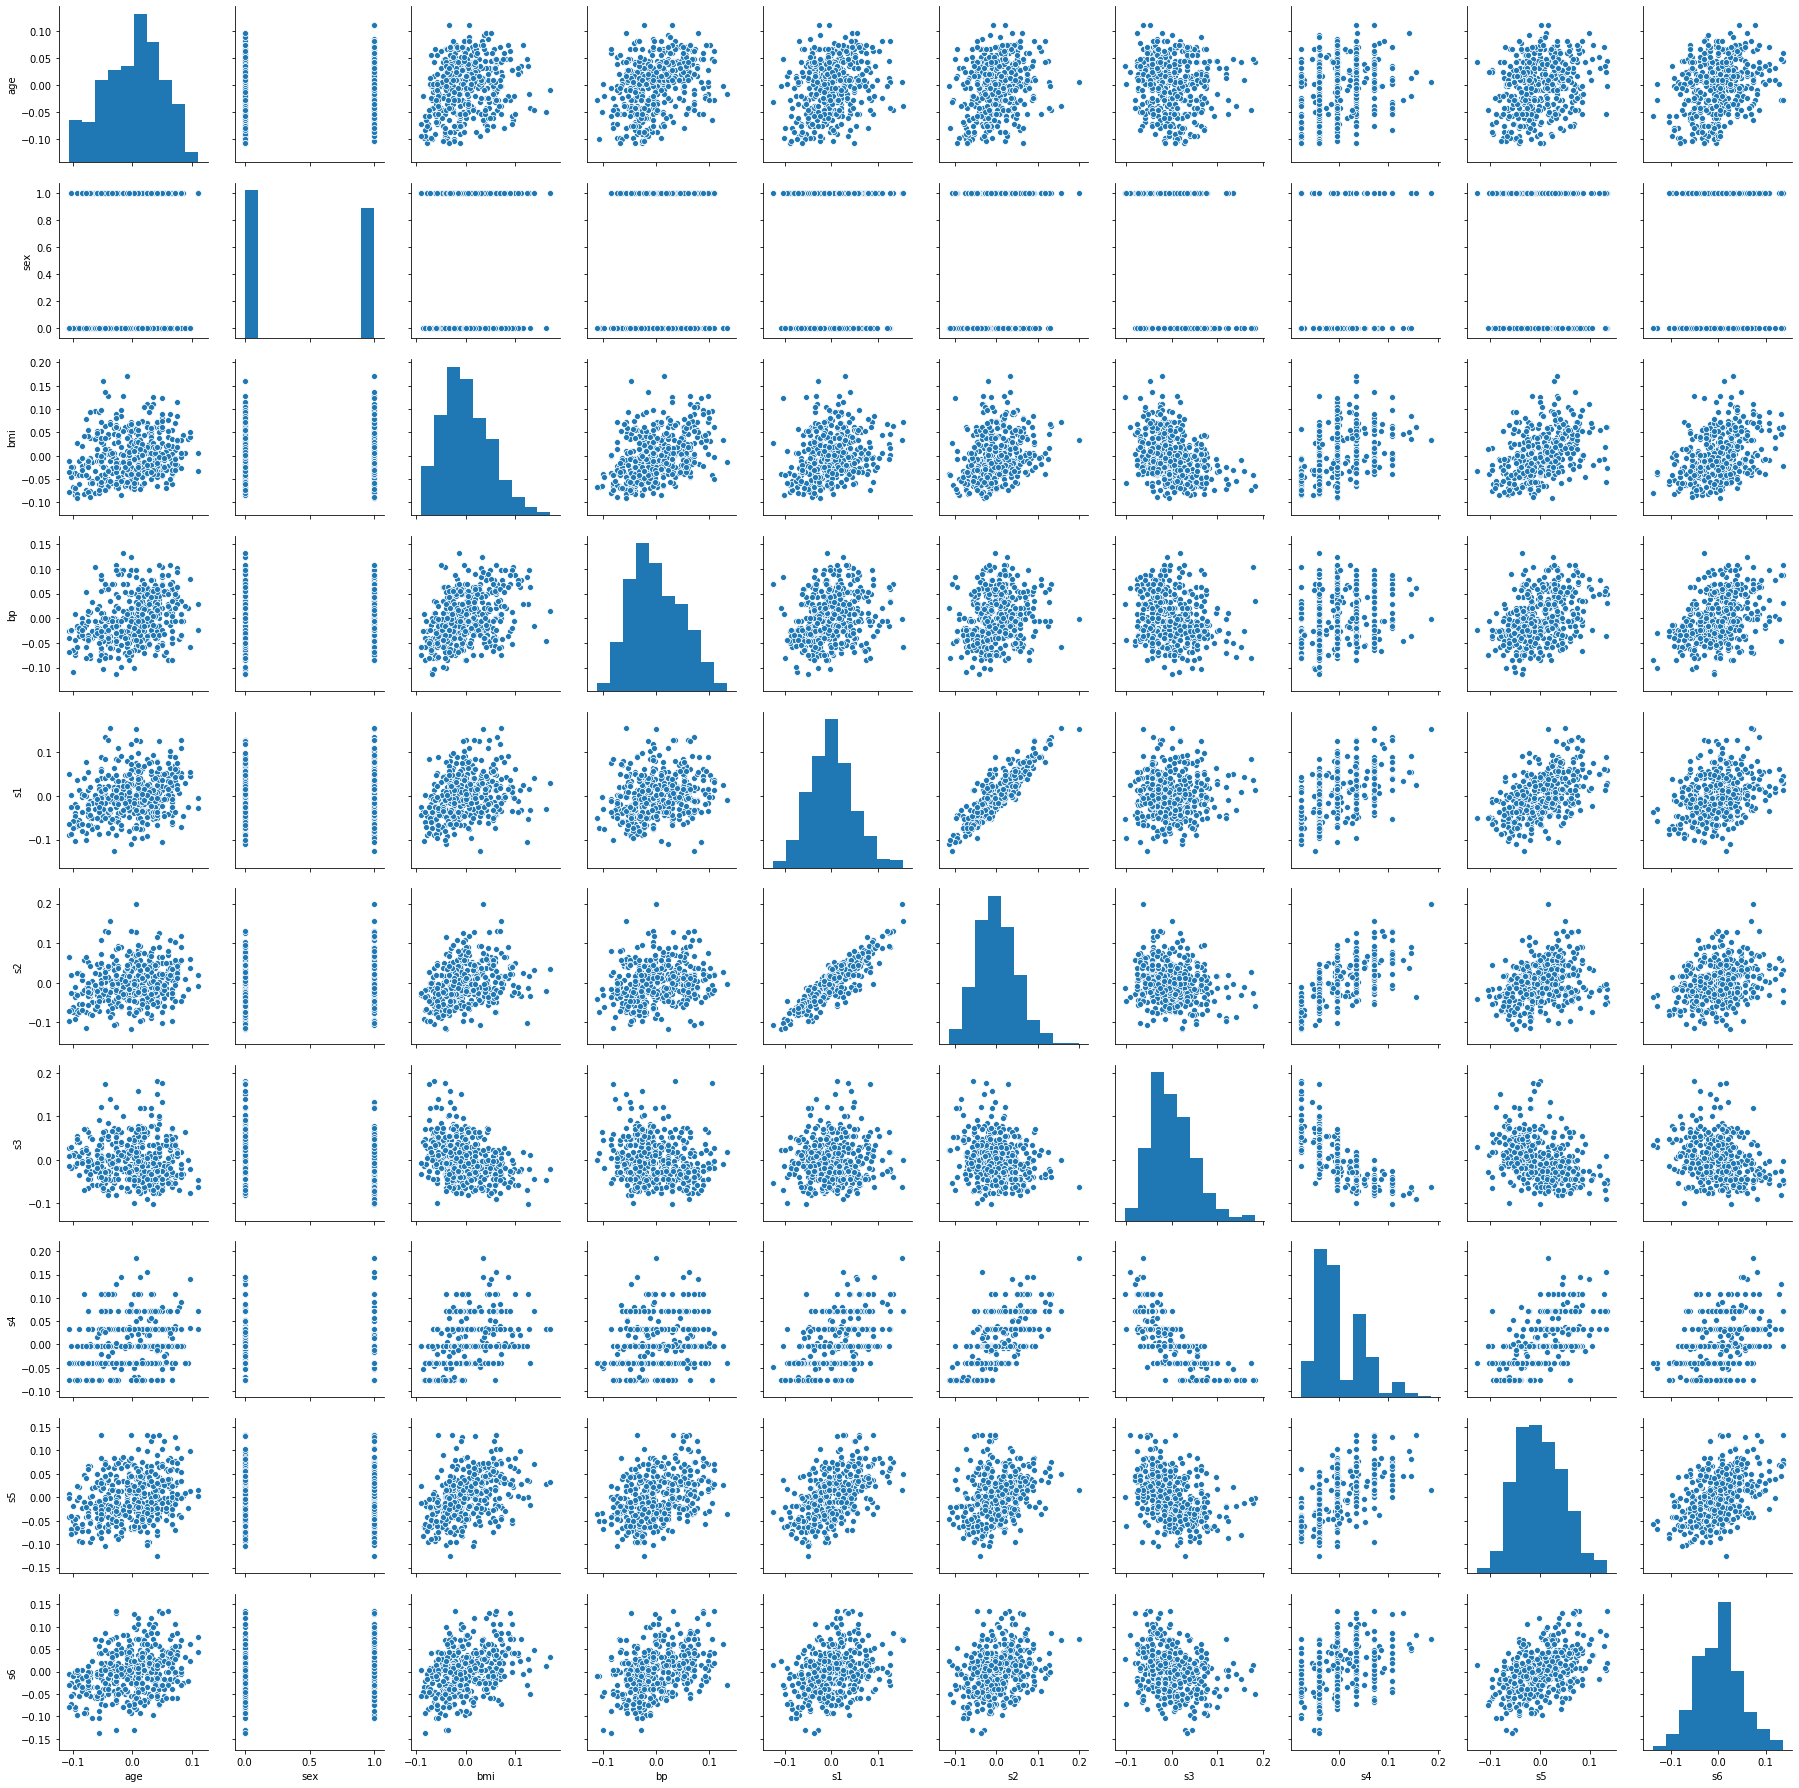

: 눈에 띄게 5,6번째가 거의 높은 상관관계를 가지고 있다.

In [17]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])


,VIF Factor,features
4,59.129633,s1
5,39.157237,s2
6,15.384939,s3
8,10.075917,s5
7,8.860635,s4
2,1.493146,bmi
9,1.480504,s6
3,1.431969,bp
0,1.210990,age
1,1.130809,sex


: 결과적으로 s1, s2, s3, s5가 vif가 10이상이므로 다중공선성이 있다고 판단된다.

### Task) Transformation

: 선형회귀모델은 변수와 타켓간의 linear한 상관관계가 있을 때 효율이 높다.
 - target을 마지막에 추가하여 모든 변수와의 관계를 파악해보자. (마지막 열, 마지막 행만 보자)

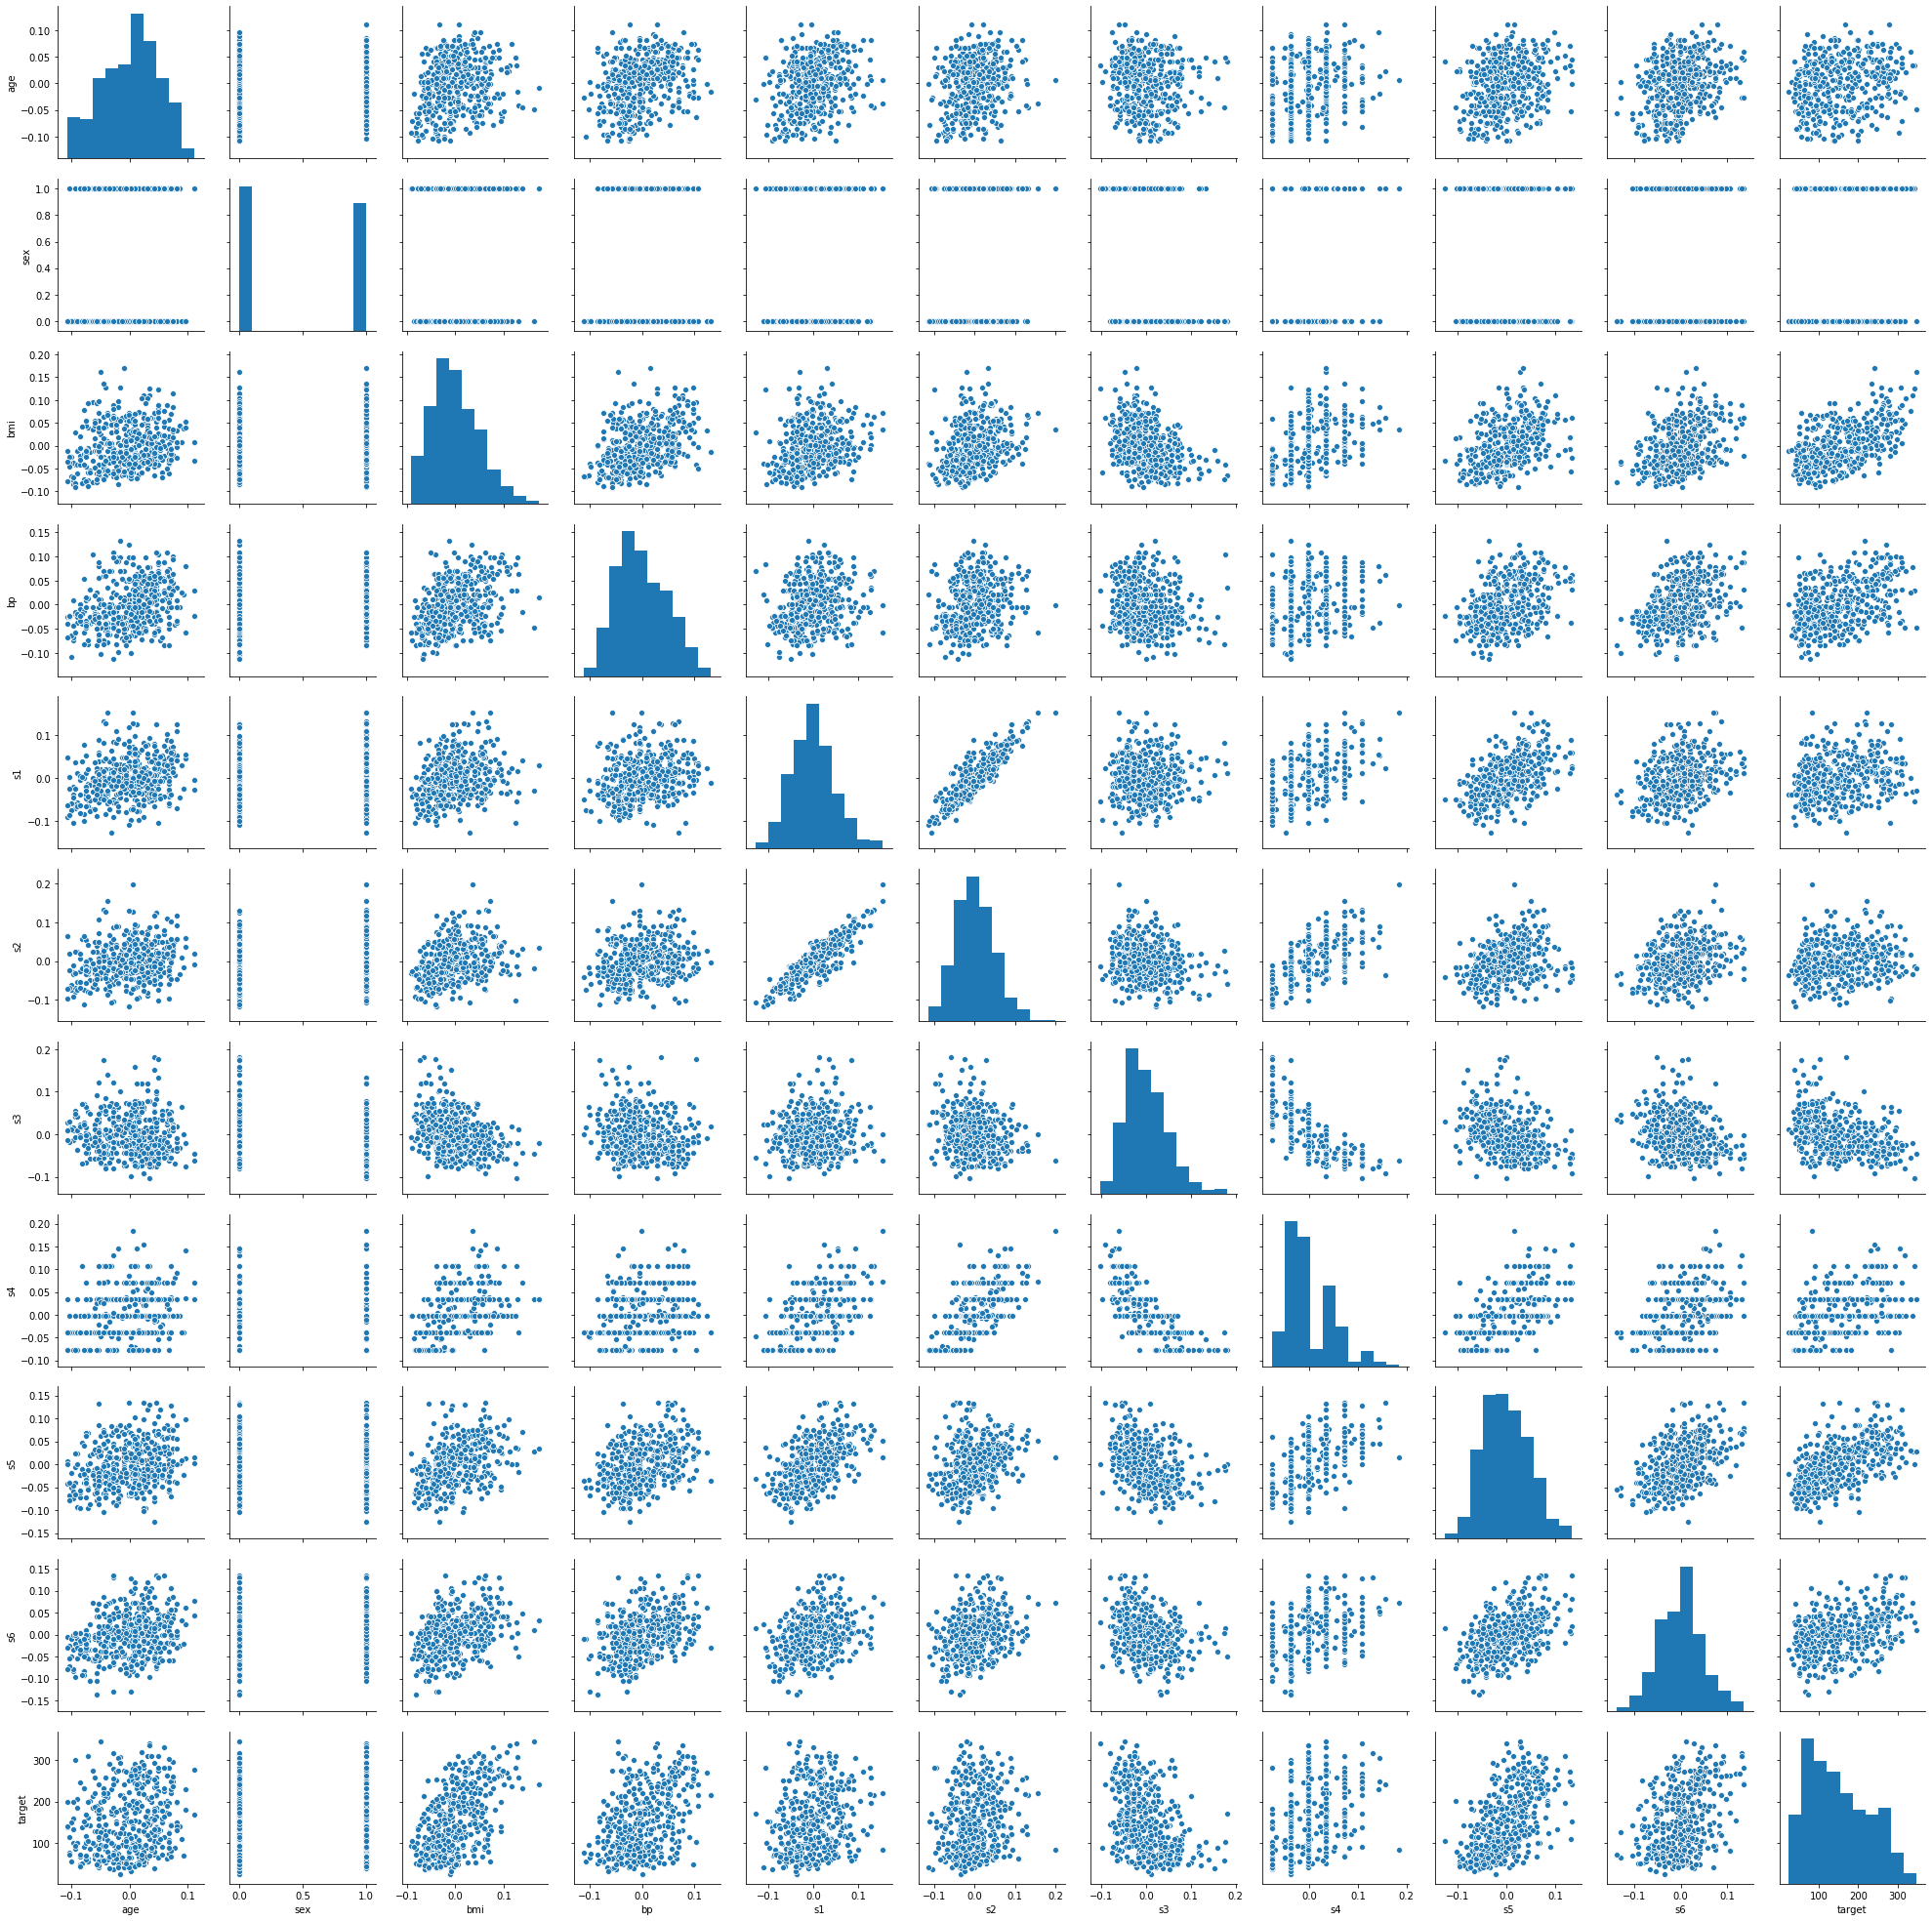

: linear하지 않은 변수들을 어떻게 변환할 수 있을까? 아니면 애초에 관계가 없는 것일까?

# Model

#### - First : sklearn.model_selection import train_test_split
#### - Second : import statsmodels.api as sm

: 두 개의 대표적인 방법이 있다.

#### First)

In [18]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#fit된 모델의 R-square


0.5539285357415584

In [21]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

2734.729272403143

In [22]:
print() #추정된 회귀계수(intercept제외)
print() #intercept

[ -35.55683674  -23.17931749  562.75404632  305.47203008 -662.78772128
  324.27527477   24.78193291  170.33056502  731.67810787   43.02846824]
163.3936057385858


In [23]:
#test데이터 예측


array([238.47145247, 248.93170646, 164.05404165, 120.30794355,
       187.42422054, 259.04865002, 113.55556372, 188.07597044,
       149.49663441, 236.01099949, 172.24629506, 178.88073764,
       109.15751983,  92.13508975, 243.33042043,  87.356971  ,
       155.72606406,  66.99073989, 100.42610442, 218.09422877,
       196.66287912, 161.29832968, 161.70779605, 156.52520454,
       197.88796516, 167.57984206, 120.74478913,  84.83879727,
       192.03728687, 160.60687024, 175.17178362,  84.22833237,
       145.7995542 , 145.97333493, 140.96488953, 197.00421108,
       165.94322494, 190.65906468, 128.22520508, 206.41941223,
        84.35851196, 164.0256504 , 144.1056776 , 184.68355549,
       177.80238966,  74.32855231, 143.3660286 , 138.67726085,
       120.81146113, 234.34252077, 161.94390244,  74.5455476 ,
       154.71905074, 156.78884927, 237.42227096, 174.23053048,
       190.88212635, 118.98373473, 132.20418974, 168.52674824,
       214.74245466, 171.42364091, 157.37409906, 108.86

In [24]:
#test데이터 R-square


0.3322220326906514

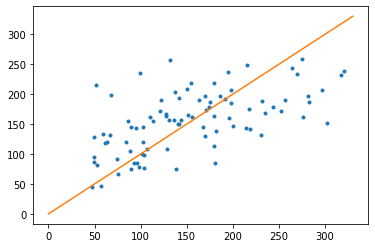

In [25]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [109]:
#Ridge, Lasso 회귀
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=1.0)#alpha: 얼마나 정규화를 할건지 정하는 양수 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [110]:
ridge.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>

In [111]:
#R-square
ridge.score(X_train,y_train)

0.4724469051825648

In [114]:
ridge=Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
ridge.score(X_train,y_train)

0.5345324716524797

In [115]:
#Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.5275858310413865

### second)

In [117]:
data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [118]:
import statsmodels.api as sm

reg = sm.OLS.from_formula("target ~ age+sex+bmi+bp+s1+s2+s3+s4+s5+s6", data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           3.83e-62
Time:                        20:53:18   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    162.8394      3.756     43.359      0.000     155.458     170.221
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex          -22.8600      5.836     -3.917      0.000     -34.330     -11.390
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""